In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

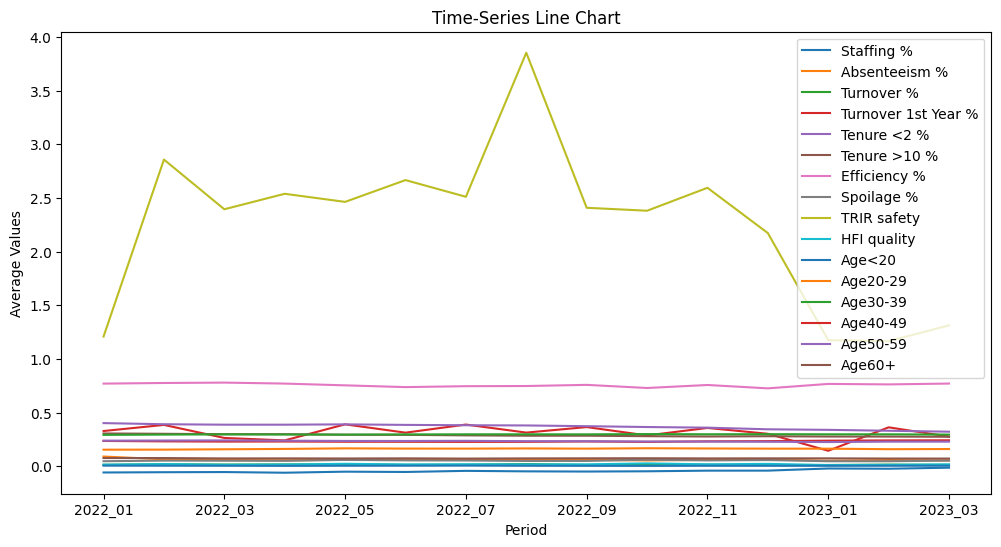

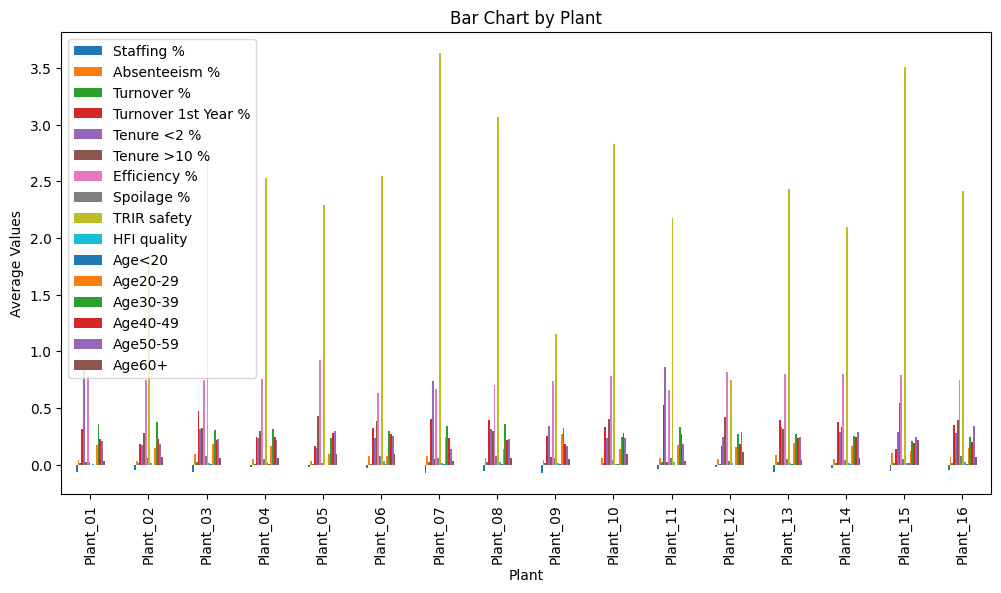

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BallCorpDataset_Op.csv")

# 1. Time-series line chart
# Exclude 'Plant' column
line_chart_data = df.drop('Plant', axis=1)

# Group by 'Period' and calculate the mean for each column
line_chart_data = line_chart_data.groupby('Period').mean()

overall_mean = line_chart_data.mean(axis=0)

# Plot the line chart
line_chart_data.plot(figsize=(12, 6))
plt.title('Time-Series Line Chart')
plt.xlabel('Period')
plt.ylabel('Average Values')
plt.show()

# 2. Bar chart
# Exclude 'Period' column
bar_chart_data = df.drop('Period', axis=1)

# Group by 'Plant' and calculate the mean for each column
bar_chart_data = bar_chart_data.groupby('Plant').mean()

# Plot the bar chart
bar_chart_data.plot(kind='bar', figsize=(12, 6))
plt.title('Bar Chart by Plant')
plt.xlabel('Plant')
plt.ylabel('Average Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


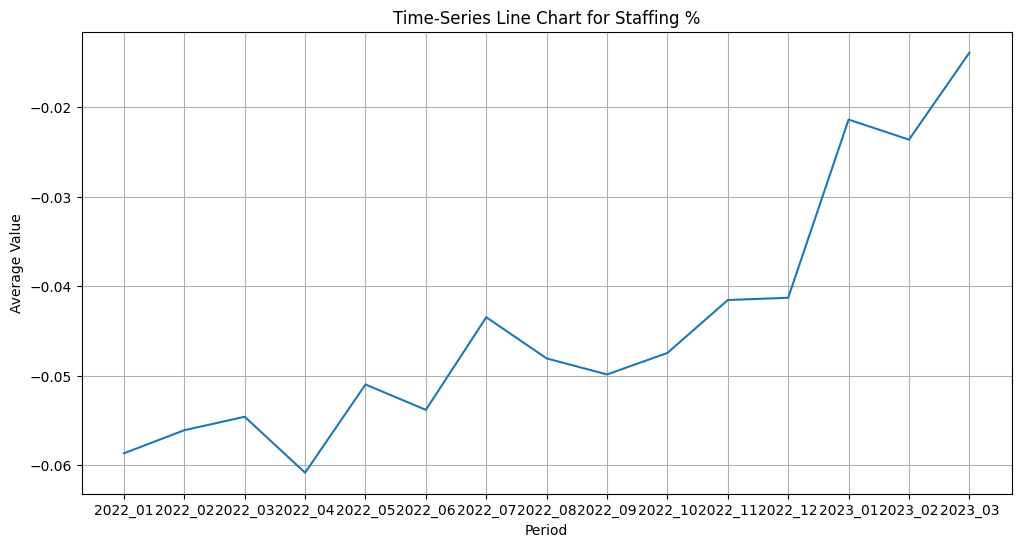

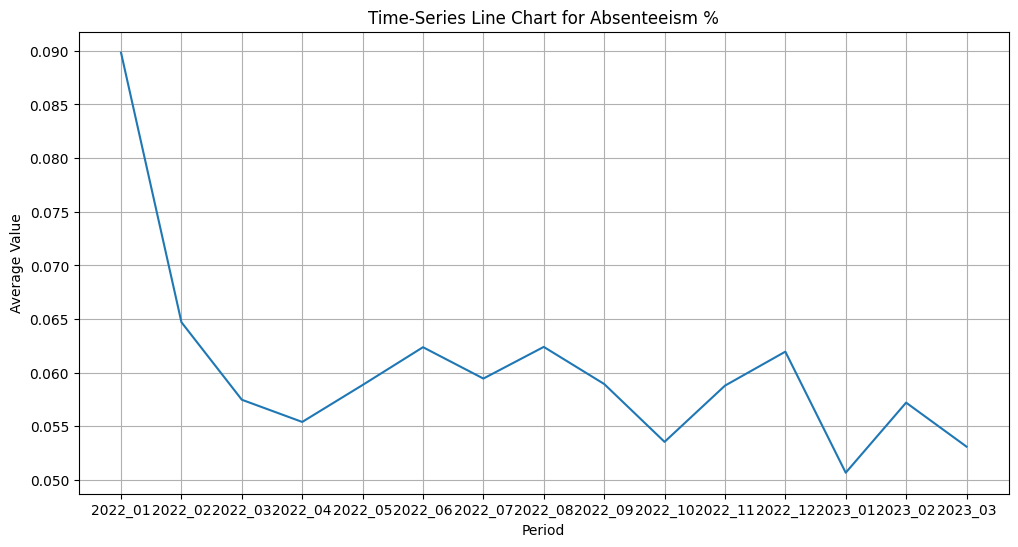

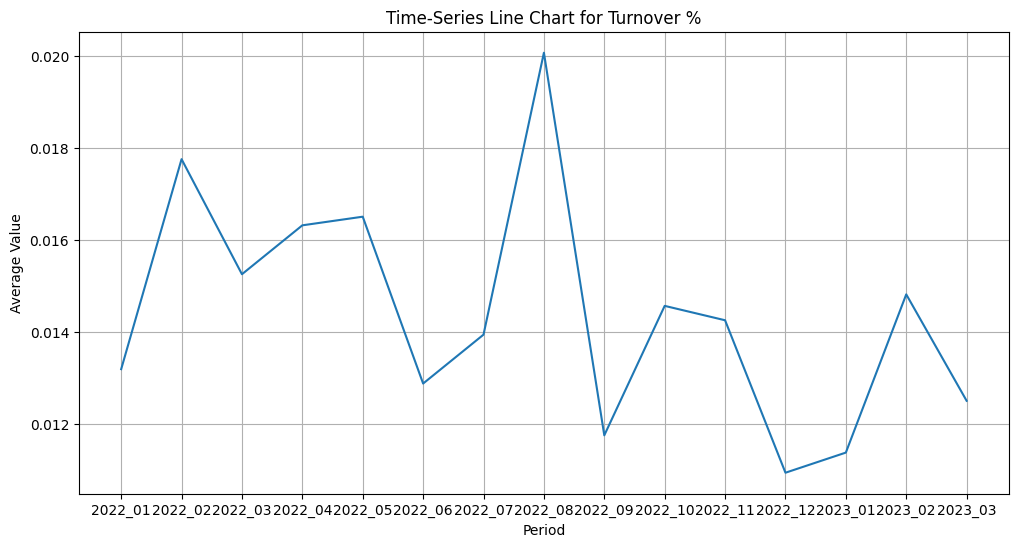

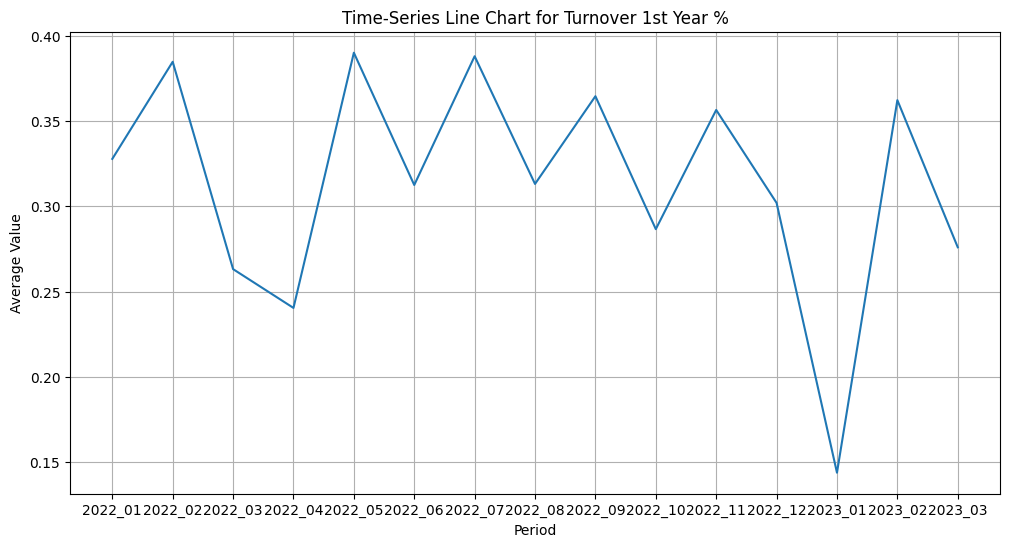

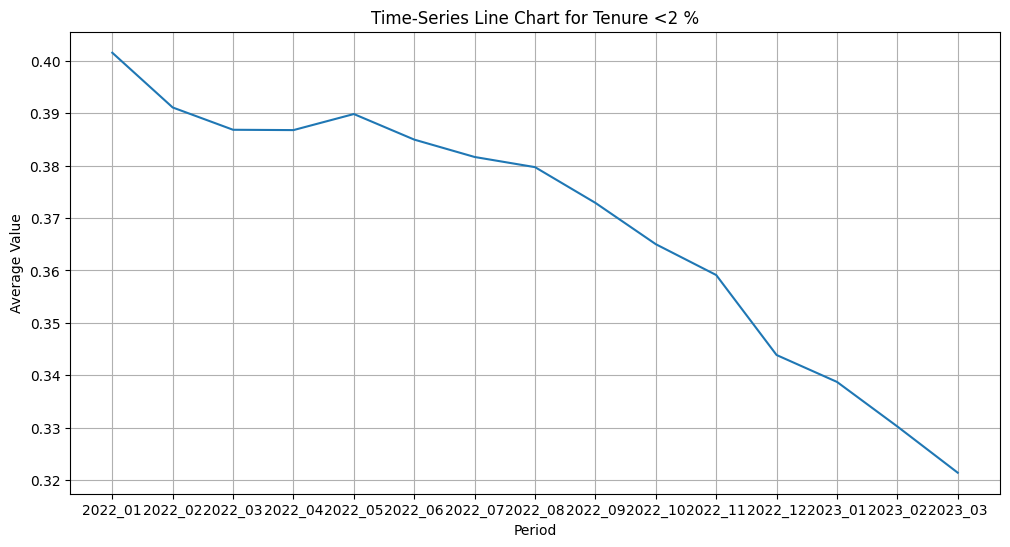

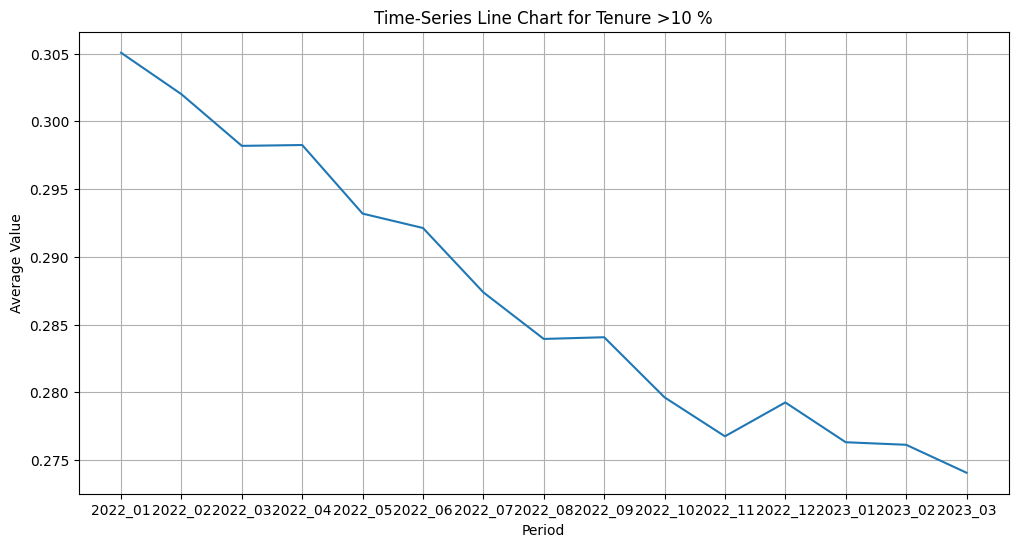

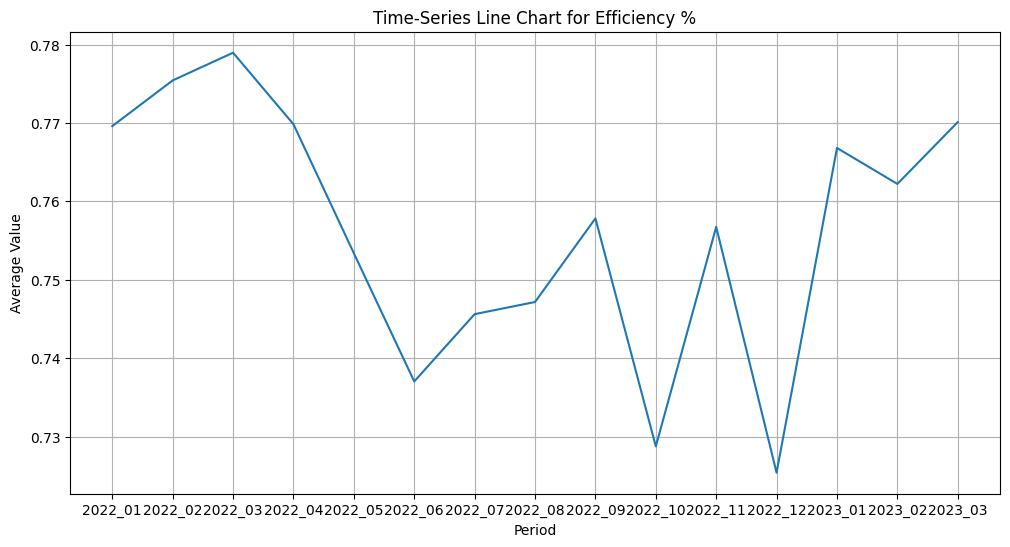

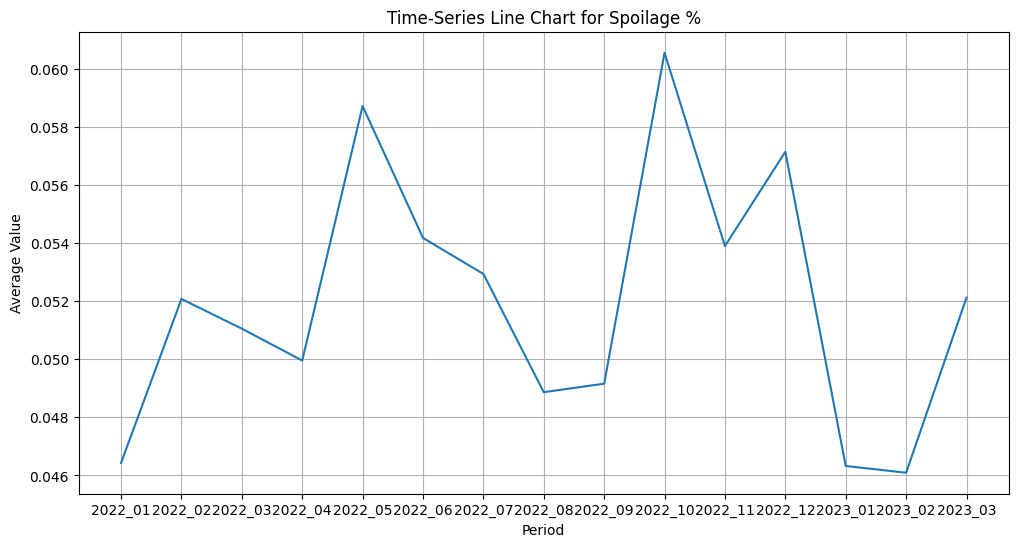

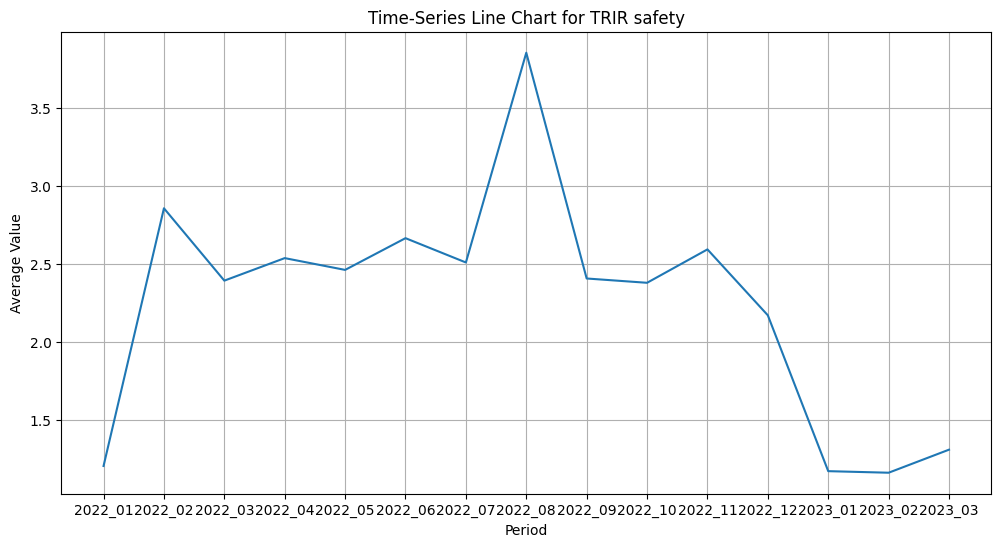

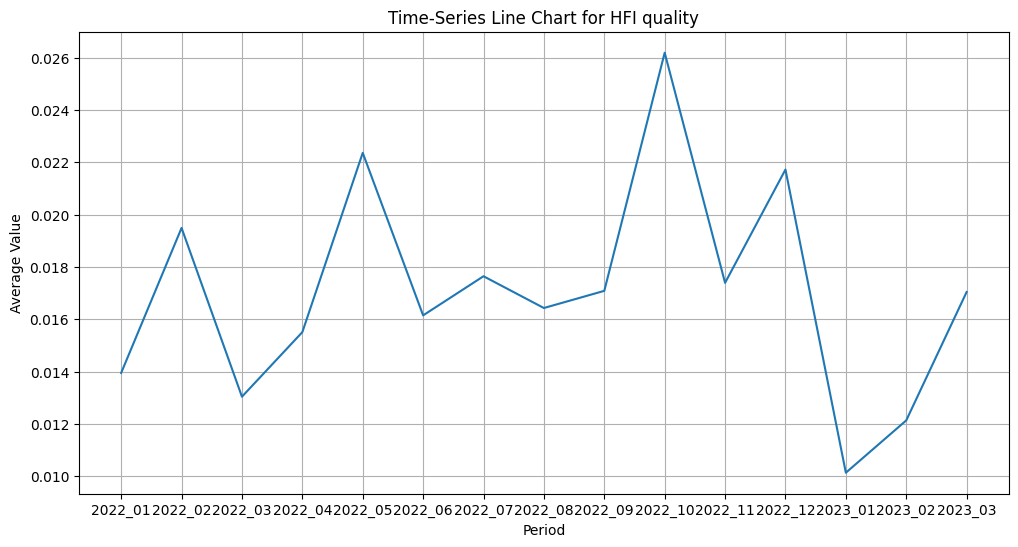

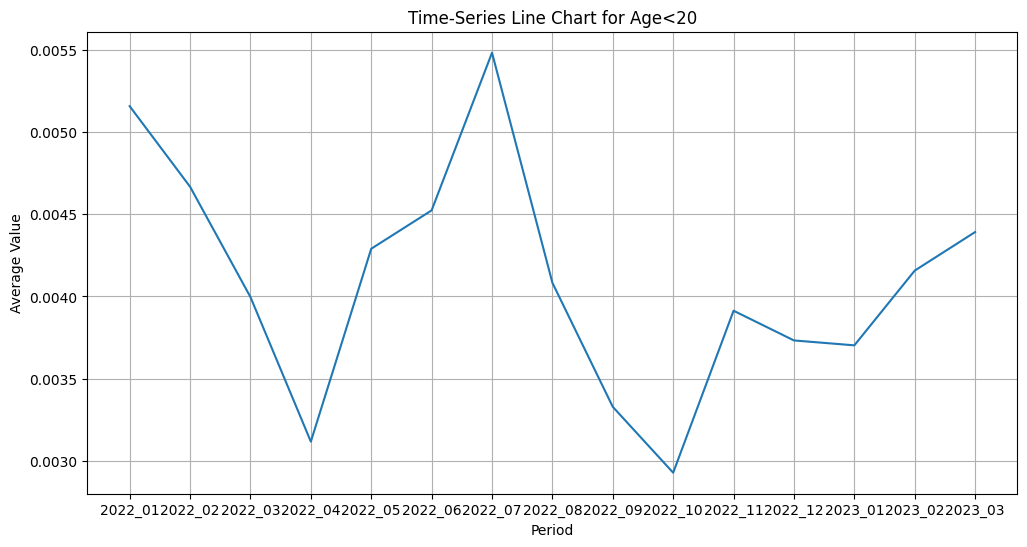

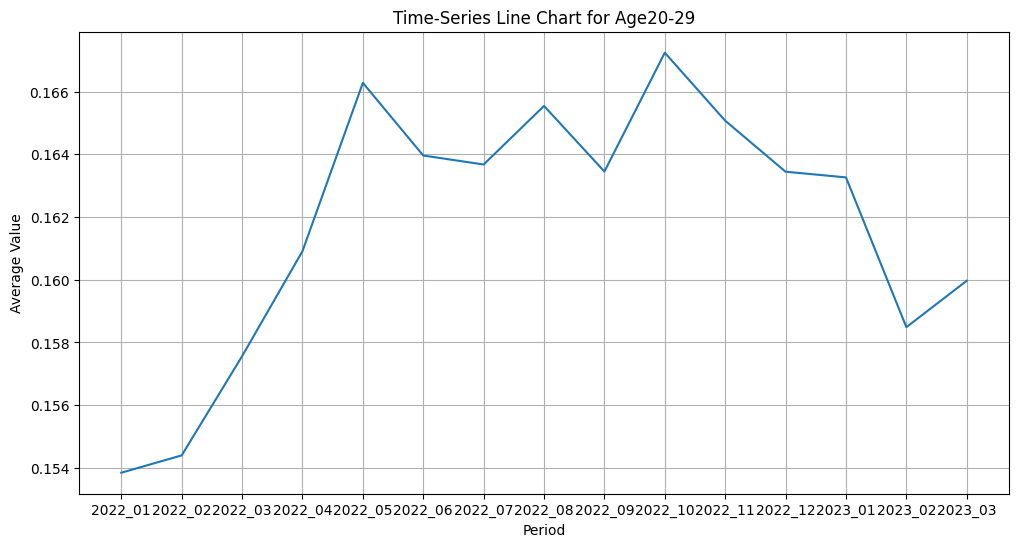

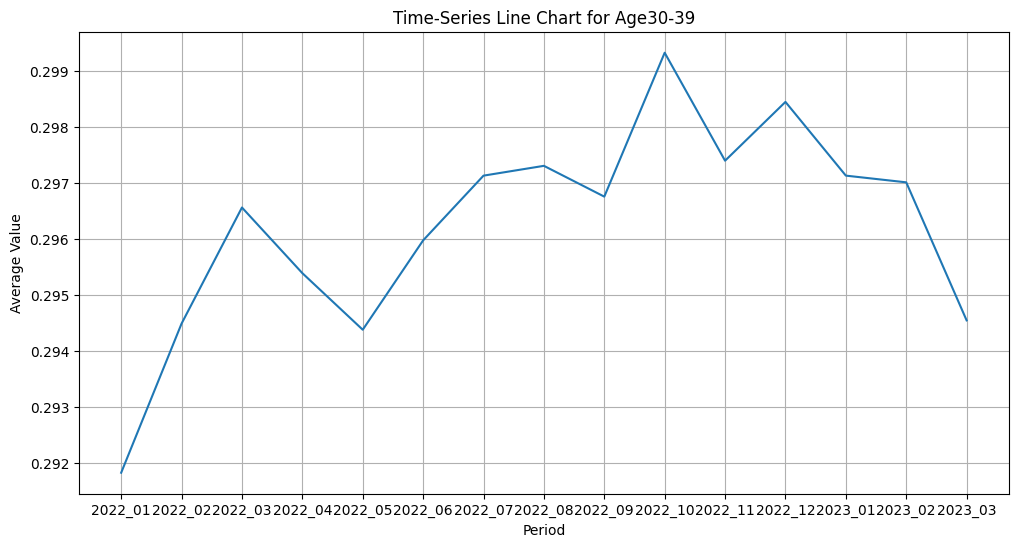

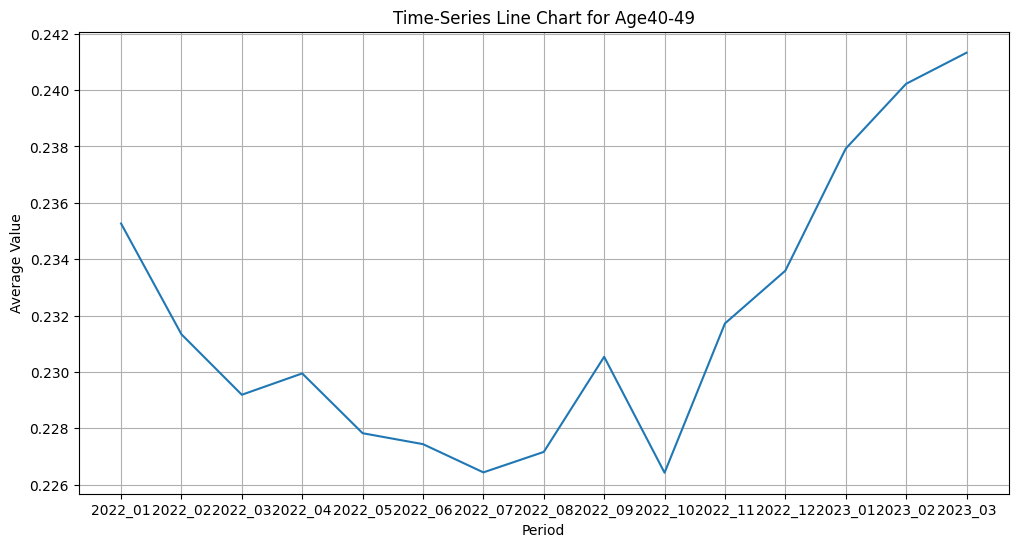

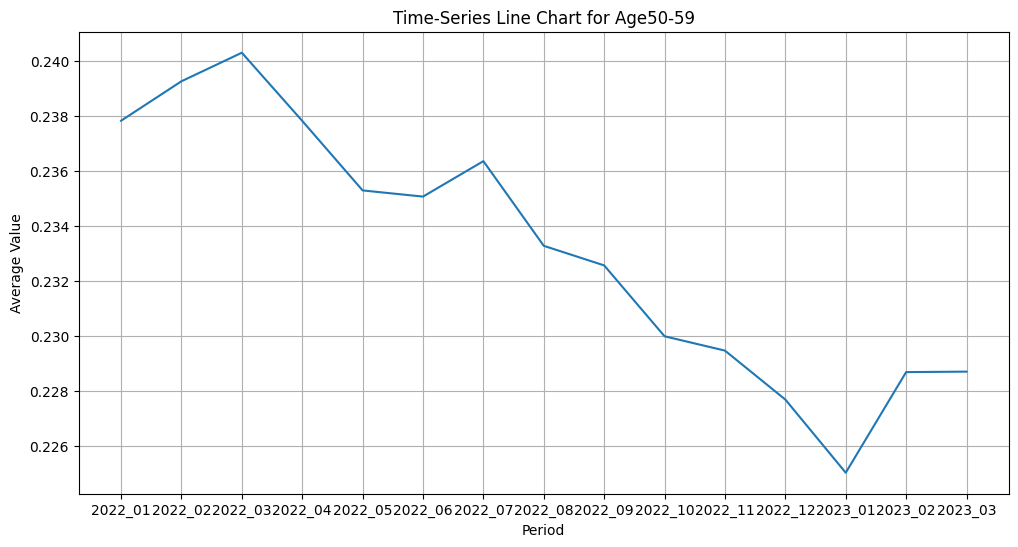

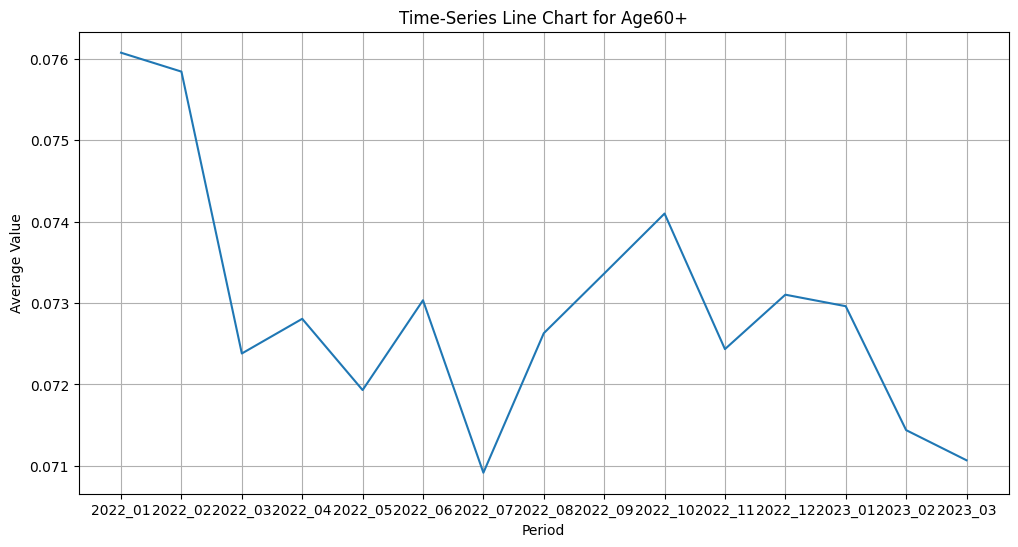

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BallCorpDataset_Op.csv")

# Exclude 'Plant' column
data = df.drop('Plant', axis=1)

# Group by 'Period' and calculate the mean for each column
data_mean = data.groupby('Period').mean()

# Plot a line chart for each variable
for column in data_mean.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(data_mean.index, data_mean[column])
    plt.title(f'Time-Series Line Chart for {column}')
    plt.xlabel('Period')
    plt.ylabel('Average Value')
    plt.grid(True)
    plt.show()


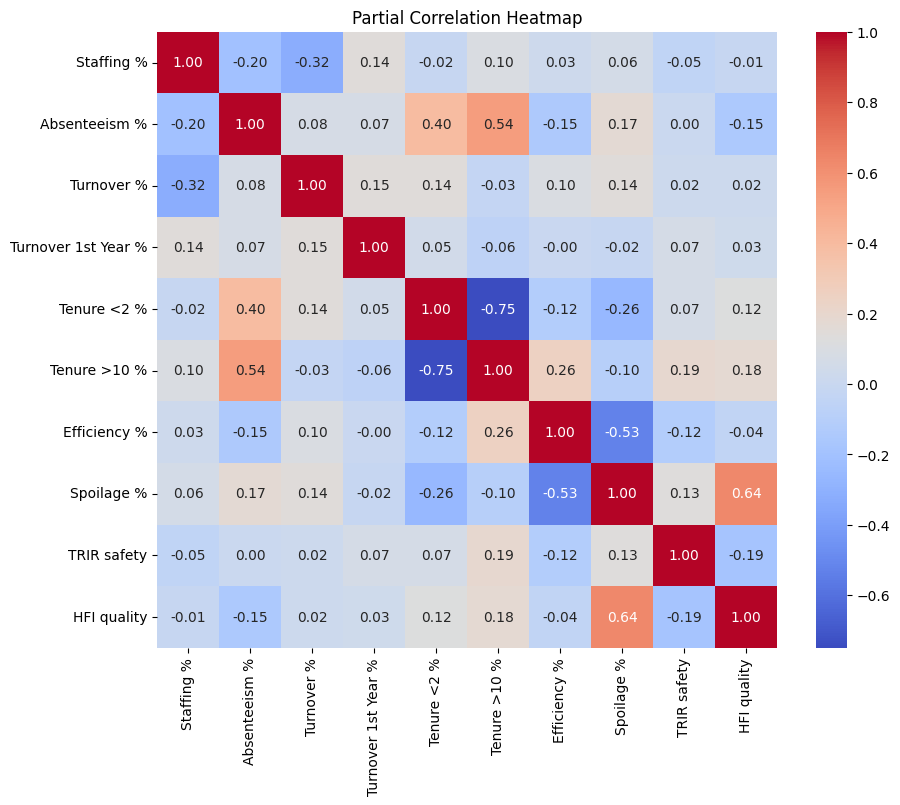

In [3]:
OpDf = pd.read_csv("BallCorpDataset_Op.csv")
# Assuming your dataframe is named df
# Drop any rows with missing values
OpDf.dropna(inplace=True)

# Select the columns for which you want to compute partial correlations
columns_of_interest = ['Staffing %', 'Absenteeism %', 'Turnover %', 'Turnover 1st Year %',
                       'Tenure <2 %', 'Tenure >10 %', 'Efficiency %', 'Spoilage %',
                       'TRIR safety', 'HFI quality']

# Compute the partial correlation matrix
partial_corr = OpDf[columns_of_interest].pcorr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(partial_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Partial Correlation Heatmap')
plt.show()

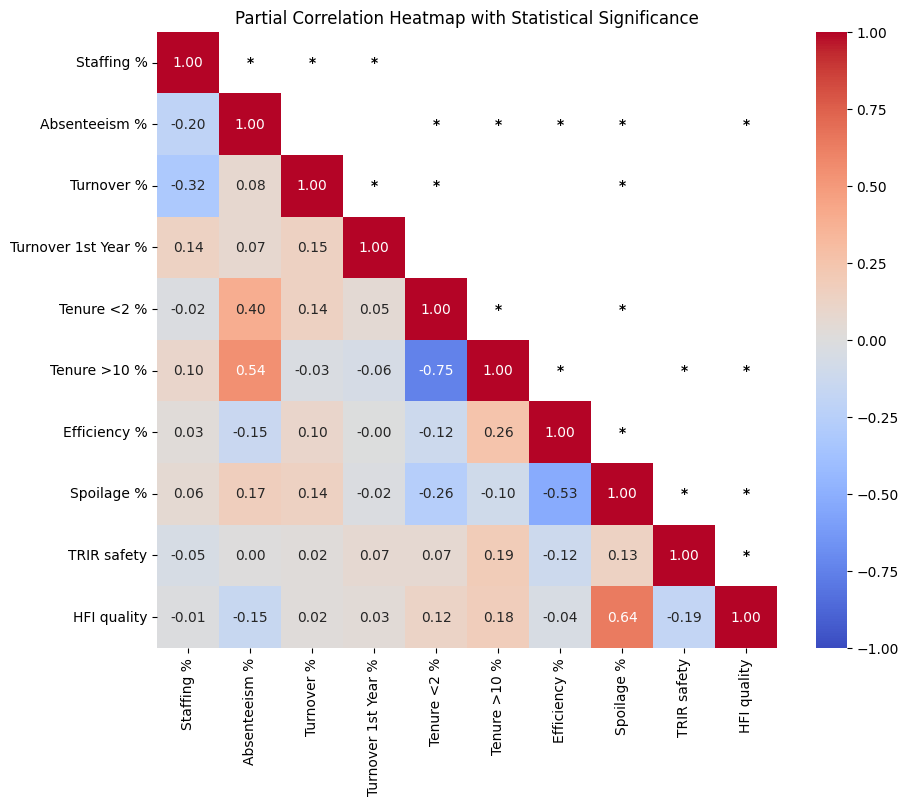

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pingouin import partial_corr
import numpy as np

# Read the dataset
OpDf = pd.read_csv("BallCorpDataset_Op.csv")

# Drop any rows with missing values
OpDf.dropna(inplace=True)

# Select the columns for which you want to compute partial correlations
columns_of_interest = ['Staffing %', 'Absenteeism %', 'Turnover %', 'Turnover 1st Year %',
                       'Tenure <2 %', 'Tenure >10 %', 'Efficiency %', 'Spoilage %',
                       'TRIR safety', 'HFI quality']

# Initialize an empty correlation matrix
corr_matrix = np.ones((len(columns_of_interest), len(columns_of_interest)))
p_values = np.zeros((len(columns_of_interest), len(columns_of_interest)))

# Loop through all pairs of variables
for i in range(len(columns_of_interest)):
    for j in range(i + 1, len(columns_of_interest)):
        x = columns_of_interest[i]
        y = columns_of_interest[j]
        covar = [col for col in columns_of_interest if col != x and col != y]

        # Compute the partial correlation and p-value
        partial_corr_result = partial_corr(OpDf[[x, y] + covar], x=x, y=y, covar=covar, method='pearson')

        # Store the partial correlation and p-value in the matrices
        corr_matrix[i, j] = partial_corr_result['r'].values[0]
        corr_matrix[j, i] = partial_corr_result['r'].values[0]
        p_values[i, j] = partial_corr_result['p-val'].values[0]
        p_values[j, i] = partial_corr_result['p-val'].values[0]

# Create a mask to hide the upper triangle and the diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, vmin=-1, vmax=1)

# Add annotations for significance
for i in range(len(columns_of_interest)):
    for j in range(i + 1, len(columns_of_interest)):
        if p_values[i, j] < 0.05:  # Assuming significance level of 0.05
            plt.text(j + 0.5, i + 0.5, "*", horizontalalignment='center', verticalalignment='center', fontweight='bold', color='k')

plt.title('Partial Correlation Heatmap with Statistical Significance')
plt.yticks(np.arange(len(columns_of_interest)) + 0.5, columns_of_interest, rotation=0)
plt.xticks(np.arange(len(columns_of_interest)) + 0.5, columns_of_interest, rotation=90)
plt.show()

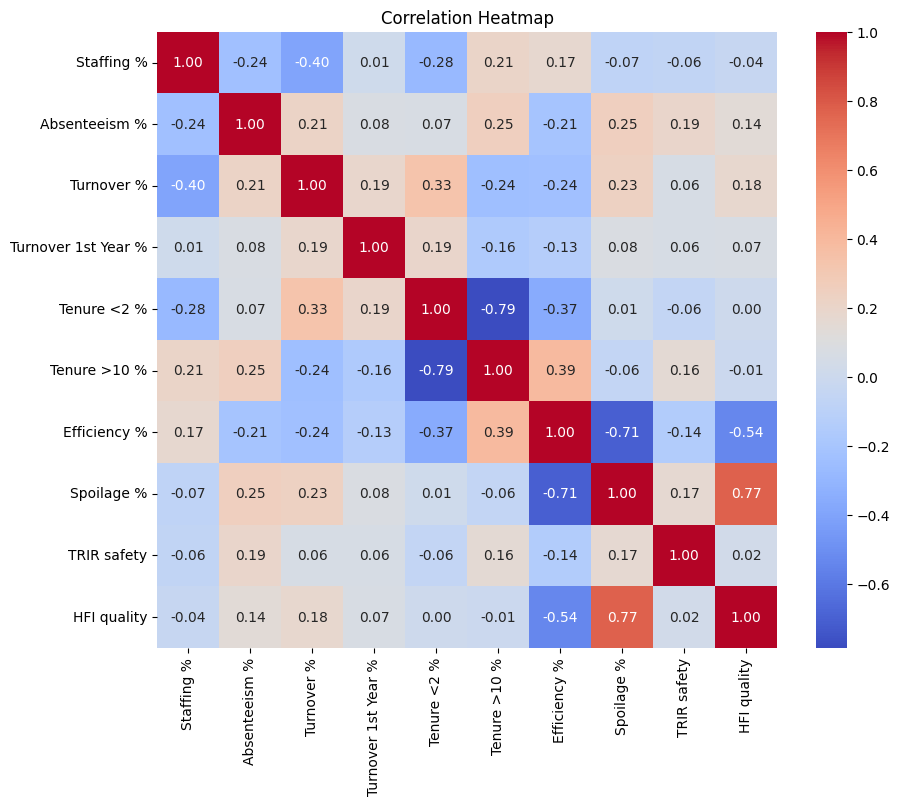

In [5]:
# Compute the correlation matrix
correlation_matrix = OpDf[columns_of_interest].corr()

# Create a heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

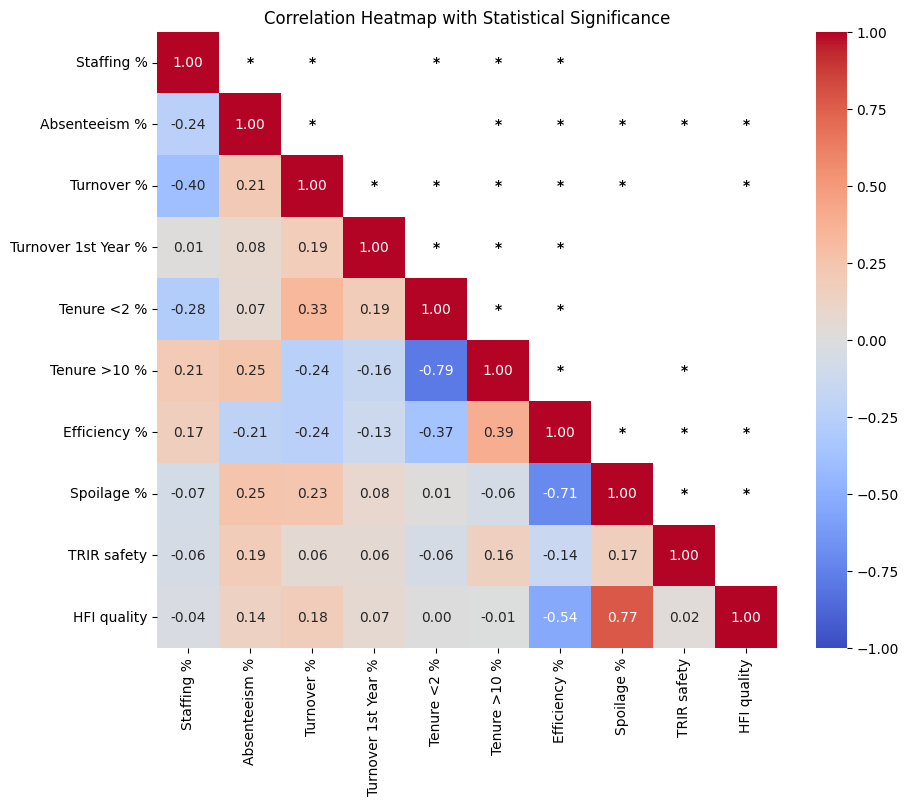

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats  # Import stats module from scipy

# Read the dataset
OpDf = pd.read_csv("BallCorpDataset_Op.csv")

# Drop any rows with missing values
OpDf.dropna(inplace=True)

# Select the columns for which you want to compute correlations
columns_of_interest = ['Staffing %', 'Absenteeism %', 'Turnover %', 'Turnover 1st Year %',
                       'Tenure <2 %', 'Tenure >10 %', 'Efficiency %', 'Spoilage %',
                       'TRIR safety', 'HFI quality']

# Compute the correlation matrix and p-values
corr_matrix = OpDf[columns_of_interest].corr(method='pearson')
p_values = OpDf[columns_of_interest].corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(*corr_matrix.shape)

# Create a mask to hide the upper triangle and the diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, vmin=-1, vmax=1)

# Add annotations for significance
for i in range(len(columns_of_interest)):
    for j in range(i + 1, len(columns_of_interest)):
        if p_values.iloc[i, j] < 0.05:  # Assuming significance level of 0.05
            plt.text(j + 0.5, i + 0.5, "*", horizontalalignment='center', verticalalignment='center', fontweight='bold', color='k')

plt.title('Correlation Heatmap with Statistical Significance')
plt.yticks(np.arange(len(columns_of_interest)) + 0.5, columns_of_interest, rotation=0)
plt.xticks(np.arange(len(columns_of_interest)) + 0.5, columns_of_interest, rotation=90)
plt.show()

In [14]:
OpDf = pd.read_csv("BallCorpDataset_Op.csv")

# Extracting features and labels
X = OpDf[['Staffing %', 'Absenteeism %', 'Turnover %', 'Turnover 1st Year %', 'Tenure <2 %', 'Tenure >10 %']]
y = np.log(OpDf['Efficiency %'])
y = OpDf['Efficiency %']

# Adding constant to X (for intercept)
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()
# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           Efficiency %   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     48.76
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.70e-48
Time:                        19:24:33   Log-Likelihood:                 387.33
No. Observations:                 240   AIC:                            -754.7
Df Residuals:                     230   BIC:                            -719.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8592    

In [8]:
OpDf = pd.read_csv("BallCorpDataset_Op.csv")

# Extracting features and labels
X = OpDf[['Staffing %', 'Absenteeism %', 'Turnover %', 'Turnover 1st Year %', 'Tenure <2 %', 'Tenure >10 %']]
y = OpDf['Spoilage %']

# Adding constant to X (for intercept)
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()
# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Spoilage %   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     6.792
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.19e-06
Time:                        18:52:13   Log-Likelihood:                 560.17
No. Observations:                 240   AIC:                            -1106.
Df Residuals:                     233   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0587    

In [9]:
OpDf = pd.read_csv("BallCorpDataset_Op.csv")

# Extracting features and labels
X = OpDf[['Staffing %', 'Absenteeism %', 'Turnover %', 'Turnover 1st Year %', 'Tenure <2 %', 'Tenure >10 %','Age<20', 'Age20-29',
       'Age30-39', 'Age40-49', 'Age50-59']]
y = OpDf['TRIR safety']

# Adding constant to X (for intercept)
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()
# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            TRIR safety   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2.409
Date:                Tue, 26 Mar 2024   Prob (F-statistic):            0.00756
Time:                        18:52:13   Log-Likelihood:                -498.29
No. Observations:                 240   AIC:                             1021.
Df Residuals:                     228   BIC:                             1062.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -12.4217    

In [10]:
OpDf = pd.read_csv("BallCorpDataset_Op.csv")

# Extracting features and labels
X = OpDf[['Staffing %', 'Absenteeism %', 'Turnover %', 'Turnover 1st Year %', 'Tenure <2 %', 'Tenure >10 %']]
y = OpDf['HFI quality']

# Adding constant to X (for intercept)
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()
# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            HFI quality   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.228
Date:                Tue, 26 Mar 2024   Prob (F-statistic):             0.0413
Time:                        18:52:13   Log-Likelihood:                 656.70
No. Observations:                 240   AIC:                            -1299.
Df Residuals:                     233   BIC:                            -1275.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0161    

In [15]:
OpDf = pd.read_csv("BallCorpDataset_Op.csv")

# Extracting features and labels
df = OpDf[['Efficiency %', 'Spoilage %', 'TRIR safety', 'HFI quality']]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Extract the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the variation explained by each principal component
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.2f}")

# Extract the principal components
pca_components = pca.components_

# Convert the principal components to a DataFrame for better visualization
pca_df = pd.DataFrame(pca_components, columns=df.columns)

# Print the principal components
print("Principal Components:")
print(pca_df)

# Extract the first principal component
pc1 = pca.components_[0]

# Create a new variable representing PC1
pc1_variable = scaled_data.dot(pc1)

# Add PC1 variable to the DataFrame
df['PC1'] = pc1_variable

# Extracting features and labels
X = OpDf[['Staffing %', 'Absenteeism %', 'Turnover %', 'Turnover 1st Year %', 'Tenure <2 %', 'Tenure >10 %']]
y = df['PC1']

# Adding constant to X (for intercept)
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()
# Print the summary of the regression results
print(results.summary())

Explained Variance Ratio:
PC1: 0.59
PC2: 0.25
PC3: 0.11
PC4: 0.04
Principal Components:
   Efficiency %  Spoilage %  TRIR safety  HFI quality
0     -0.545190    0.609923     0.140589     0.557670
1     -0.009348   -0.033346     0.975218    -0.218520
2      0.778926    0.114969     0.145627     0.599041
3      0.309766    0.783367    -0.089320    -0.531416
                            OLS Regression Results                            
Dep. Variable:                    PC1   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     6.611
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.81e-06
Time:                        19:39:17   Log-Likelihood:                -425.62
No. Observations:                 240   AIC:                             865.2
Df Residuals:                     233   BIC:                             889.6
Df Model: 

C:\Users\Yuhui Lin\AppData\Local\Temp\ipykernel_18820\3315740967.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PC1'] = pc1_variable


In [12]:
print(OpDf.columns)

Index(['Period', 'Plant', 'Staffing %', 'Absenteeism %', 'Turnover %',
       'Turnover 1st Year %', 'Tenure <2 %', 'Tenure >10 %', 'Efficiency %',
       'Spoilage %', 'TRIR safety', 'HFI quality', 'Age<20', 'Age20-29',
       'Age30-39', 'Age40-49', 'Age50-59', 'Age60+'],
      dtype='object')
